## Morphological Operations
Raghuttam Hombal<br>2K20E22


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Declaring a function that does the operation of Dilation and Erosion<br>
<b>Dilation:</b><br>This is done by  $$G(x,y) = I(x,y) \oplus Kernel$$ The center element is replaced by 1, if any of the pixels hit, or in other words, when we AND the corresponding pixels of some region and Kernel, and if any of the pixel is 1, then the returned answer is 1. This is done for the whole image.<br>
<br><b>Erosion:</b> This is given by $$G(x,y) = I(x,y) \ominus Kernel$$ The center element is replaced by 1, if any of the pixels fits completely. This can be written as $$\bar{G(x,y)} =\bar{I(x,y)}\oplus Kernel$$

In [2]:
def morphological_operate(img,ker,choice='dilate'):
    
    img_ = np.zeros(img.shape)
    kx,ky = ker.shape
    kx,ky = int(kx/2),int(ky/2)
    for i in range(kx,img.shape[0]-kx):
        for j in range(ky,img.shape[1]-ky):
            select = img[i-kx:i+kx+1,j-ky:j+ky+1]
            if choice=='erode':
                img_[i][j] = np.logical_not(np.sum(np.logical_not(select).any() and ker.any()))
            elif choice=='dilate':
                img_[i][j] = np.sum(select.any() and ker.any())
    return img_.astype(int)

Trials, just testing the function on a sample Image

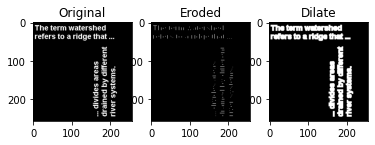

In [3]:
text = cv2.imread("text.png",0)
plt.subplot(1,3,1)
plt.imshow(text,cmap='gray')
plt.title("Original")
plt.subplot(1,3,2)
plt.imshow(morphological_operate(text.copy(),np.ones([3,3]),'erode'),cmap='gray')
plt.title("Eroded")
plt.subplot(1,3,3)
plt.imshow(morphological_operate(text.copy(),np.ones([3,3]),'dilate'),cmap='gray')
plt.title("Dilate")
plt.show()

In [4]:
bacteria = cv2.imread('bacteria.png')
bacteria = cv2.cvtColor(bacteria,cv2.COLOR_BGR2GRAY)

The below functions are used to generate the Structural Elements for Cross and Diamond, as they as not available.<br>
<br><b>Cross</b> is generated by, simple logic of making pixels bright, if and only if, i==j or i+j=n<br>
<b>Diamond</b> is generated by, creating a PLUS matrix (uses in-built MORPH_CROSS parameter), then dilating it several times

In [5]:
def getStructuralElement_Cross(n):
    M = np.zeros((n,n),dtype=np.uint8)
    for i in range(n):
        for j in range(n):
            if i==j:
                M[i][j] = 1
            if i+j==n-1:
                M[i][j] = 1
    return M

def getStructuralElement_Diamond(n):
    M = np.zeros((n,n), dtype=np.uint8)
    M[2,2] = 1

    k1 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    n=int(n/2)
    if n>1:
        return cv2.dilate(M, k1, iterations=n)
    else:
        return k1
k=np.zeros([3,3])
k[0,:]=np.ones(3)

Creating a List of all structural elements that will be used later for operations

In [6]:
SE = []
SE.append({'title':'Square 3x3','strel':cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))})
SE.append({'title':'Square 5x5','strel':cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))})
SE.append({'title':'Square 7x7','strel':cv2.getStructuringElement(cv2.MORPH_RECT,(7,7))})
SE.append({'title':'Circle r=3','strel':cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))})
SE.append({'title':'Circle r=4','strel':cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(4,4))})
SE.append({'title':'Circle r=5','strel':cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))})
SE.append({'title':'Diamond d=3','strel':getStructuralElement_Diamond(3)})
SE.append({'title':'Diamond d=4','strel':getStructuralElement_Diamond(4)})
SE.append({'title':'Cross 3x3','strel':getStructuralElement_Cross(3)})
SE.append({'title':'Cross 5x5','strel':getStructuralElement_Cross(5)})
SE.append({'title':'Line 1x3','strel':k})

### Task 1: 
##### Dilation of Bacteria.png

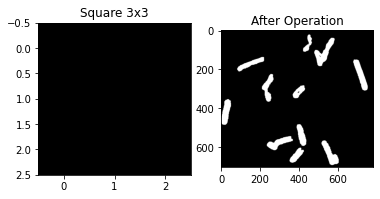

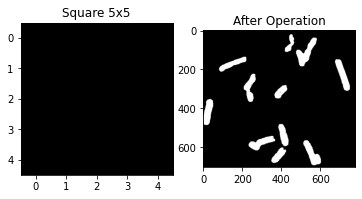

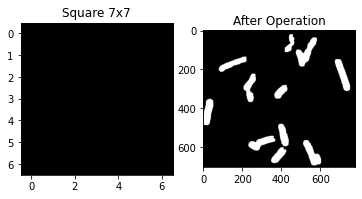

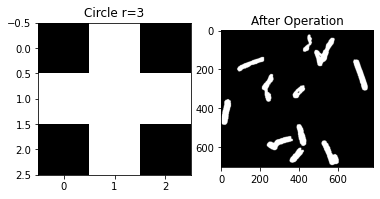

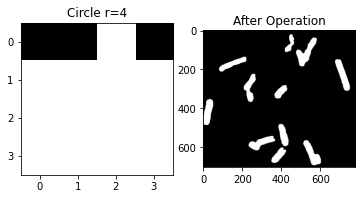

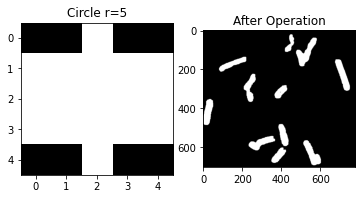

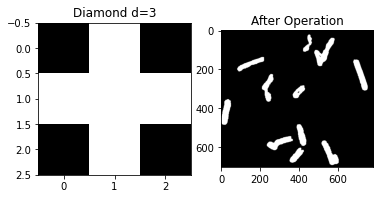

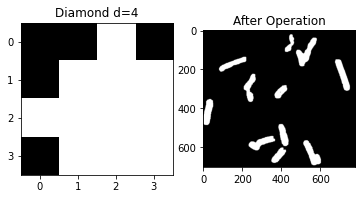

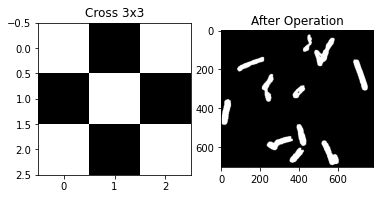

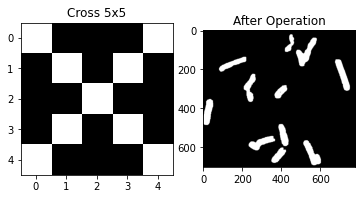

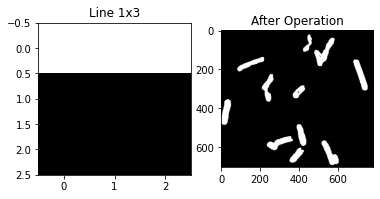

In [15]:
n = len(SE)
for i in range(n):
    plt.subplot(1,2,1)
    plt.imshow(SE[i]['strel'],cmap='gray')
    plt.title(SE[i]['title'])
    plt.subplot(1,2,2)
    plt.imshow(morphological_operate(bacteria.copy(),SE[i]['strel'],'dilate'),cmap='gray')
    plt.title('After Operation')
    plt.show()

##### Erosion of Bacteria.png

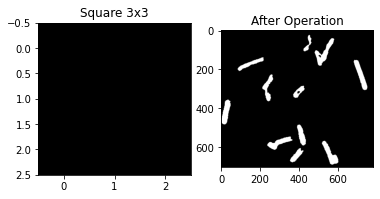

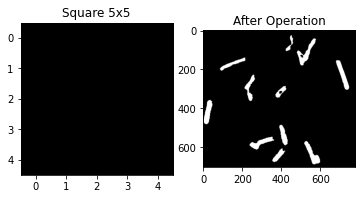

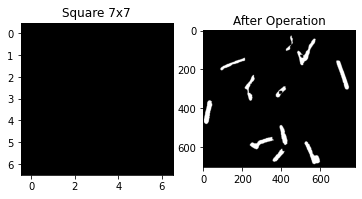

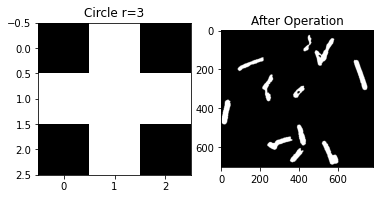

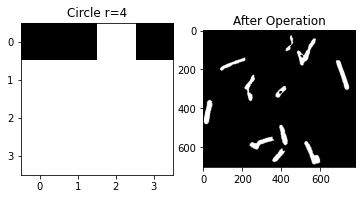

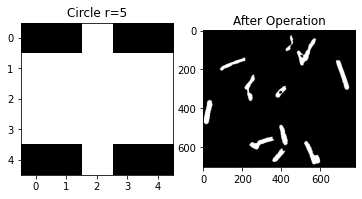

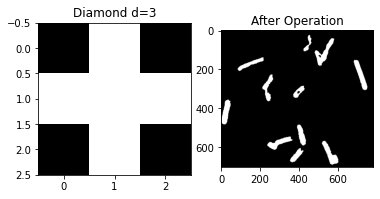

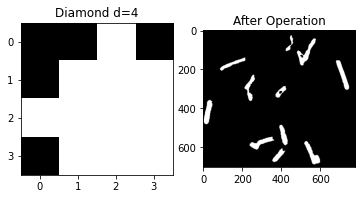

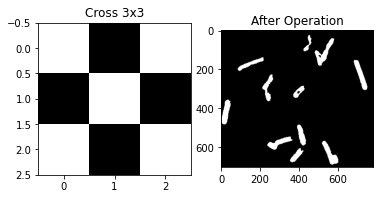

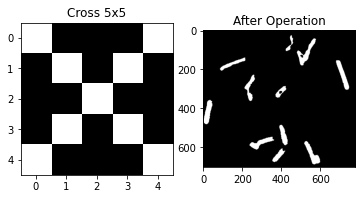

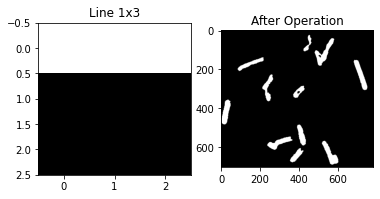

In [16]:
n = len(SE)
for i in range(n):
    plt.subplot(1,2,1)
    plt.imshow(SE[i]['strel'],cmap='gray')
    plt.title(SE[i]['title'])
    plt.subplot(1,2,2)
    plt.imshow(morphological_operate(bacteria.copy(),SE[i]['strel'],'erode'),cmap='gray')
    plt.title('After Operation')
    plt.show()

### Task 2: Separate the connected Circles
The Structural element that I tried to use from the above list was the Circle, as we were interested in operating on the circles. The maximum size that was available to use was that of radius=5. Hence, we repeatedly iterate the same Structural Element until we get the desired output

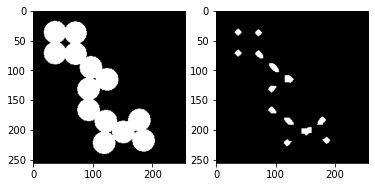

In [8]:
circles = cv2.imread('circles.png')
circles = cv2.cvtColor(circles,cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,1)
plt.imshow(circles,cmap='gray')
plt.subplot(1,2,2)
new_img = circles.copy()
for lk in range(5):
    new_img = morphological_operate(new_img.copy(),SE[5]['strel'],'erode')
plt.imshow(new_img,cmap='gray')
plt.show()

It could have been better and easier if the size of the Structural element was similar to that of the circle, but that was not an option for us as we had to use the mentioned Structural elements only.

### Task 3: Finding the Hole in Fence


In [9]:
def thresholder_invert(img,t):
	for i in range(img.shape[0]):
		for j in range(img.shape[1]):
			if img[i][j] > t:
				img[i][j] = 0
			else:
				img[i][j] = 255

	return img

We read the image and observe the basic element such that we can choose our Structural element accordingly.

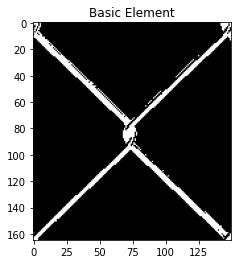

In [10]:
fence = cv2.imread('fence.jpg')
fence = cv2.cvtColor(fence,cv2.COLOR_BGR2GRAY)
fence = thresholder_invert(fence,200)
basic = fence[:165,:150]
plt.imshow(basic,cmap='gray')
plt.title("Basic Element")
plt.show()

Hence we generate a Cross of a smaller size yet considerably similar to that of basic element to do the job. Dilation is performed on the Image and we look for the places that are not dilated and mark them. as we shall be left only with the areas that would be untouched by the dilated operation

In [11]:
ker =getStructuralElement_Cross(80)
crossed = morphological_operate(fence.copy(),ker)


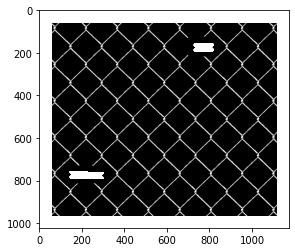

In [12]:
points = np.nonzero(crossed==0)
plt.imshow(fence,cmap='gray')
plt.scatter(points[1],points[0],marker='x',color='white')
plt.show()

### Task 4: Edge Detection
The Original Image is dilated first, then the original image can either by subtracted from dilated image, or XORed as we have done here. Here, the thickness of the Edge is determined by the size of structural element. More the size, thicker will be the edge

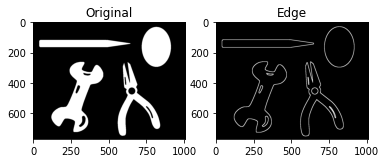

In [13]:
clipart = cv2.imread('cliparts.png')
clipart = cv2.cvtColor(clipart,cv2.COLOR_BGR2GRAY)
clipartDilate = morphological_operate(clipart.copy(),SE[2]['strel'])
clipart_edge = np.logical_xor(clipartDilate,clipart)
plt.subplot(1,2,1)
plt.imshow(clipart,cmap='gray')
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(clipart_edge,cmap='gray')
plt.title("Edge")
plt.show()